In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
img_size = 224
Batch_size = 32

In [5]:
train_data=ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_gen=train_data.flow_from_directory('/content/drive/MyDrive/BrainTumor/Train',target_size=(img_size,img_size),batch_size=Batch_size,
class_mode='binary',subset='training')


Found 88 images belonging to 2 classes.


In [6]:
val_gen=train_data.flow_from_directory('/content/drive/MyDrive/BrainTumor/Train',target_size=(img_size,img_size),batch_size=Batch_size,
class_mode='binary',subset='validation')

Found 22 images belonging to 2 classes.


In [7]:
model=keras.Sequential([
layers.Conv2D(32,(3,3),activation='relu',input_shape=(img_size,img_size,3)),
layers.MaxPooling2D((2,2)),
layers.Conv2D(64,(3,3),activation='relu',input_shape=(img_size,img_size,3)),
layers.MaxPooling2D((2,2)),
layers.Flatten(),
layers.Dense(128,activation='relu'),
layers.Dense(1,activation='sigmoid')
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,907,521 (91.20 MB)

 Trainable params: 23,907,521 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_gen,epochs=6,validation_data=val_gen,batch_size=Batch_size)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/6
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 6s/step - accuracy: 0.5192 - loss: 1.4453 - val_accuracy: 0.5455 - val_loss: 1.4431
Epoch 2/6
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.7651 - loss: 0.6129 - val_accuracy: 0.6364 - val_loss: 0.4513
Epoch 3/6
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.7955 - loss: 0.4552 - val_accuracy: 0.8182 - val_loss: 0.3728
Epoch 4/6
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.9537 - loss: 0.2079 - val_accuracy: 0.8636 - val_loss: 0.3389
Epoch 5/6
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.9662 - loss: 0.1346 - val_accuracy: 0.8636 - val_loss: 0.3629
Epoch 6/6
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.9594 - loss: 0.0931 - val_accuracy: 0.8636 - val_loss: 0.3313


In [9]:
model.save('/content/drive/MyDrive/BrainTumor/model.h5')

In [10]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np


In [11]:
model=load_model('/content/drive/MyDrive/BrainTumor/model.h5')

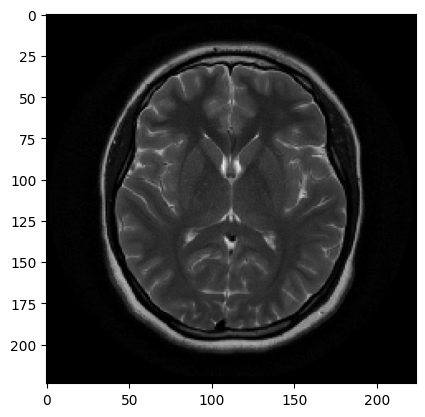

In [12]:
test_im='/content/drive/MyDrive/BrainTumor/Train/no/N1468.jpg'
im=image.load_img(test_im,target_size=(224,224))
plt.imshow(im)
plt.axis()
plt.show()

In [13]:
img_array=image.img_to_array(im)
img_array=np.expand_dims(img_array,axis=0)
img_array /=225
pre=model.predict(img_array)
if pre>=0.5:
  print('you have brain tumor')
else:
  print('you have no brain tumor')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
you have no brain tumor
